<a href="https://colab.research.google.com/github/ThanikPimpiban/mulitivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ข้อ 1 (Pizza.csv)

# ส่วน Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#**นำข้อมูลเข้า**

In [2]:
data = pd.read_csv('/content/Pizza.csv')   ## ทำการดึง data จาก session

In [3]:
data     ## แสดง data ที่นำเข้ามา

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#**plot scatter ของ data ทั้งหมด**

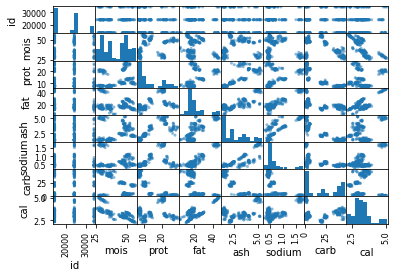

In [4]:
pd.plotting.scatter_matrix(data);       ### ทำการ plot scatter ของ data ที่นำเข้ามา

In [5]:
new_data=data.iloc[:,2:]   ## เลือกเอาตัวเลขมาใช้จึงตัด column  ที่ไม่ใช่ออก
new_data

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#**plot scatter ของ data ที่ตัด column ที่ไม่ได้ใช้**

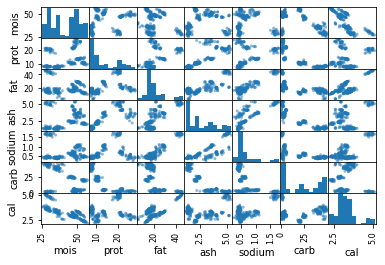

In [6]:
pd.plotting.scatter_matrix(new_data);      #### plot scatter ของ data ที่โดนตัด Column ที่ไม่ได้ใช้ออกแล้ว

In [119]:
corr = np.corrcoef(new_data.to_numpy().T)           #### คำนวณหาค่า correlation 
corr


array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [8]:
corr.shape    ### ดูรูปร่าง matirx ของค่า correlation 

(7, 7)

**ใช้ for loop หา Column ที่มีค่า correlation ที่เท่ากับ 1**

In [9]:
for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if (i !=j )  and (corr[i,j] == 1.):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

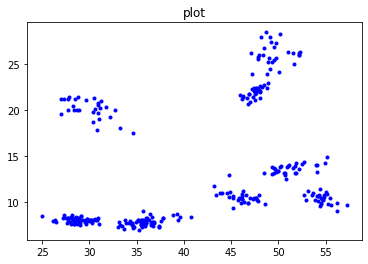

In [10]:
plt.plot(new_data.iloc[:,0],new_data.iloc[:,1],'b.');   # plot กราฟ จุด เพื่อดูการกระจายของ data
plt.title('plot');

**plot กราฟ parallel**

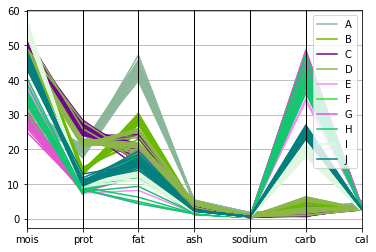

In [31]:
pd.plotting.parallel_coordinates(data,'brand',cols=['mois',	'prot',	'fat'	,'ash',	'sodium','carb'	,'cal']) 

**ทำ PCA**

In [12]:
pca = PCA(n_components=2)

In [120]:
new_pca = pca.fit_transform(new_data.to_numpy())   ### กำหนด ตัวแปร(new_pca)

In [14]:
new_pca.shape    ### ดูรูปร่างของ pca อันใหม่

(300, 2)

In [15]:
BD= set(data['brand'])
BD

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

**กำหนด Dictionary ให้ข้อความที่เป็น text เป็นตัวเลข เพื่อใช้ในการแทนค่าสี**

In [16]:
BD_l = list(BD)  ## แปลงเป็น list
BD_l.sort()  ### เรียงจากน้อยไปมาก
color_list2 = {}     ### คำสั่งวนลูปเพื่อเปลี่ยนข้อมูลเป็นตัวเลข
num = 0
for each_fg in BD_l:
     if each_fg not in color_list2:
       color_list2[each_fg] = num
       num += 1 

In [17]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [18]:
data_dropped = data.replace(color_list2)

In [29]:
data_dropped

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,9,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


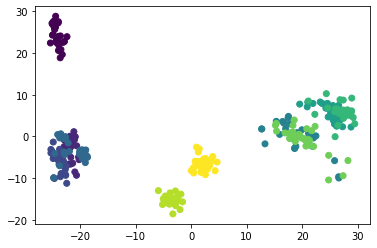

In [20]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'])

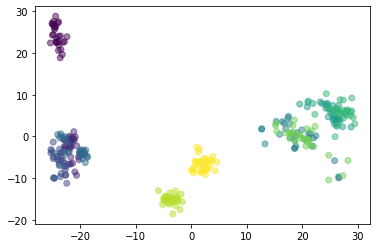

In [21]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped['brand'],alpha=0.5)

In [22]:
bb = data_dropped[(data_dropped['brand']==2) | (data_dropped['brand']==9)]

In [23]:
bb

,brand,id,mois,prot,fat,ash,sodium,carb,cal
60,2,14058,48.40,26.05,21.40,3.44,0.50,0.71,3.00
61,2,14022,48.69,28.48,17.37,3.53,0.43,1.93,2.78
62,2,14036,48.88,25.23,20.89,3.22,0.47,1.78,2.96
63,2,14093,48.97,25.63,19.28,3.48,0.55,2.64,2.87
64,2,14080,48.84,23.98,23.37,3.00,0.52,0.81,3.09
65,2,14029,49.73,25.65,19.98,2.51,0.52,2.13,2.91
66,2,14106,50.18,28.30,15.79,3.47,0.45,2.26,2.64
67,2,14014,48.15,27.98,18.69,3.58,0.48,1.70,2.87
68,2,14073,49.72,27.31,16.89,3.08,0.25,3.00,2.73
69,2,14151,51.59,26.24,16.41,3.61,0.60,2.15,2.61


In [24]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

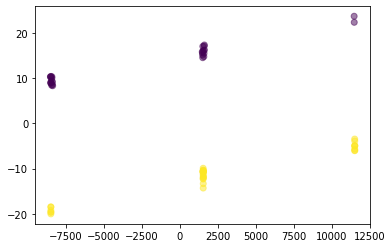

In [37]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['brand'],alpha=0.5)

In [45]:
sodium_pca = pca.transform(bb[bb['brand']==2].iloc[:,1:].to_numpy())
carb_pca = pca.transform(bb[bb['brand']==9].iloc[:,1:].to_numpy())

Text(0.5, 1.0, ' sodium and carb')

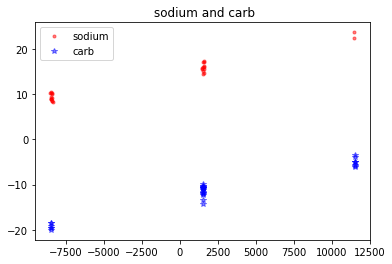

In [122]:
plt.plot(sodium_pca[:,0],sodium_pca[:,1],'.r',alpha=0.5,label='sodium')
plt.plot(carb_pca[:,0],carb_pca[:,1],'*b',alpha=0.5,label='carb')
plt.legend()
plt.title(' sodium and carb')

**2 Principle components เป็นการอธิบายตัวแทนของข้อมูลได้ดีแค่ไหน??**

In [50]:
pca.explained_variance_ratio_

array([9.99996222e-01, 3.64815497e-06])

In [52]:
pca.components_

array([[ 9.99999754e-01, -1.27538097e-04, -3.87038667e-04,
        -3.16178572e-05, -2.09489479e-05,  4.57763937e-06,
         5.70300062e-04,  4.20206577e-06],
       [ 6.98877704e-04,  1.15317640e-01,  5.54932705e-01,
         1.11209115e-01,  3.38376566e-02, -5.10524984e-03,
        -8.15605553e-01, -3.33128854e-04]])

## ข้อ 2 (nndb_flat.csv)

In [53]:
data = pd.read_csv('nndb_flat.csv')   ### load data ที่ 2

In [56]:
data.head(5)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [54]:
data.shape   ### ดูรูปร่างของ data

(8618, 45)

**เลือกเฉพาะ column ที่มีตัวเลข**

In [57]:
newdata = data.iloc[:,7:]   #### ตัด Column ทีไม่ได้ใช้ตัวเลข
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,2.32,3,0.042,0.034,0.005,24,0.000,0.02,2,0.000,24,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,2.32,3,0.042,0.034,0.005,24,0.016,0.16,2,0.004,23,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,2.80,0,0.003,0.005,0.001,4,0.001,0.00,0,0.000,3,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,0.25,36,1.016,0.382,0.029,528,0.040,0.31,23,0.009,387,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,0.26,20,0.118,0.351,0.014,674,0.024,0.43,24,0.012,451,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


**หาค่า correlation**

In [123]:
corr = np.corrcoef(newdata.to_numpy().T)     ### คำนวณหาค่า Correlation 
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

**ใช้ for loop หา column ที่มีค่า corr เท่ากับ 1**

In [64]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'คอลัมน์ = {i} เท่ากับ คอลัมน์ = {j} ที่ค่า corr = {corr[i,j]}')

คอลัมน์ = 7 เท่ากับ คอลัมน์ = 24 ที่ค่า corr = 1.0
คอลัมน์ = 9 เท่ากับ คอลัมน์ = 26 ที่ค่า corr = 1.0
คอลัมน์ = 10 เท่ากับ คอลัมน์ = 27 ที่ค่า corr = 1.0
คอลัมน์ = 12 เท่ากับ คอลัมน์ = 29 ที่ค่า corr = 1.0
คอลัมน์ = 13 เท่ากับ คอลัมน์ = 30 ที่ค่า corr = 1.0
คอลัมน์ = 20 เท่ากับ คอลัมน์ = 35 ที่ค่า corr = 1.0
คอลัมน์ = 21 เท่ากับ คอลัมน์ = 36 ที่ค่า corr = 1.0
คอลัมน์ = 22 เท่ากับ คอลัมน์ = 37 ที่ค่า corr = 1.0
คอลัมน์ = 24 เท่ากับ คอลัมน์ = 7 ที่ค่า corr = 1.0
คอลัมน์ = 26 เท่ากับ คอลัมน์ = 9 ที่ค่า corr = 1.0
คอลัมน์ = 27 เท่ากับ คอลัมน์ = 10 ที่ค่า corr = 1.0
คอลัมน์ = 29 เท่ากับ คอลัมน์ = 12 ที่ค่า corr = 1.0
คอลัมน์ = 30 เท่ากับ คอลัมน์ = 13 ที่ค่า corr = 1.0
คอลัมน์ = 31 เท่ากับ คอลัมน์ = 14 ที่ค่า corr = 1.0
คอลัมน์ = 35 เท่ากับ คอลัมน์ = 20 ที่ค่า corr = 1.0
คอลัมน์ = 36 เท่ากับ คอลัมน์ = 21 ที่ค่า corr = 1.0
คอลัมน์ = 37 เท่ากับ คอลัมน์ = 22 ที่ค่า corr = 1.0


**plot กราฟแสดง column ที่มีค่า corr เท่ากับ 1**

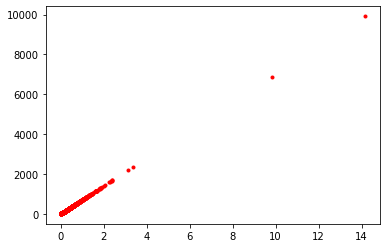

In [65]:
plt.plot(newdata.iloc[:,35],newdata.iloc[:,20],'r.')

**ทำการลบ column ที่มีค่า corr เป็น 1**

In [88]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [89]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**plot กราฟ parallel**

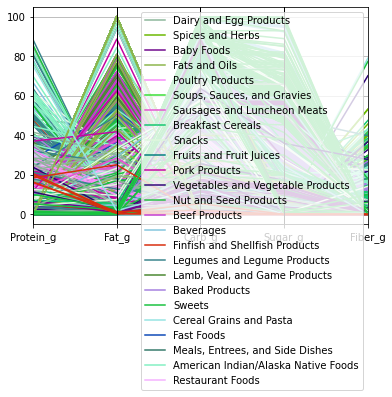

In [67]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

**ทำ PCA**

In [87]:
pca = PCA(n_components=2)

In [90]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [91]:
new_pca.shape   ### ดูรูปร่างของ new_pca

(8618, 2)

In [92]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

In [93]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

**กำหนด Dictionary ให้ text เป็น number เพื่อใช้ในการ plot**

In [94]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [95]:
color_list2

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

In [81]:
data_dropped2 = data_dropped.replace(color_list2)

In [82]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,3,24,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,3,24,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,0,4,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,36,528,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,20,674,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,15,66,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,20,10,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,0,13,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,6,10,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


**plot กราฟ scatter**

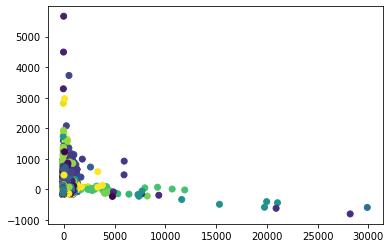

In [96]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

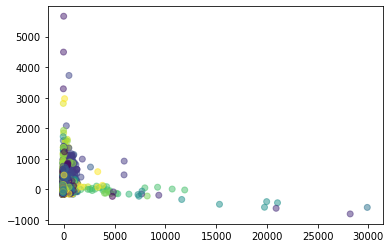

In [97]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

In [98]:
bb = data_dropped2[(data_dropped2['FoodGroup']==1) | (data_dropped2['FoodGroup']==8)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
295,1,347,0.00,0.02,86.68,57.40,0.0,0,0.014,0.00,8.0,1,12,0.037,0.24,0.062,1.9,0.000000,0.008235,0.0000,0.088889,0.000667,0.0025,0.003563,0.007692,0.012500,0.010000,0.000041,0.016667,0.012857,0.034545,0.002727
296,1,81,12.03,2.52,2.43,0.00,0.0,0,0.039,1.26,2.1,8,5,0.148,0.98,0.037,2.9,0.000000,0.022941,0.5250,0.023333,0.024667,0.0200,0.155938,0.103846,0.010833,0.004167,0.000164,0.026190,0.132857,0.052727,0.201818
297,1,81,12.03,2.52,2.43,0.00,0.0,0,0.039,1.26,2.1,8,5,0.148,0.98,0.037,2.9,0.000000,0.022941,0.5250,0.023333,0.024667,0.0200,0.155938,0.103846,0.010833,0.004167,0.000164,0.026190,0.132857,0.052727,0.201818
298,1,81,13.12,2.45,1.51,0.00,0.0,0,0.049,1.65,0.0,5,6,0.148,0.76,0.037,3.5,0.000000,0.028824,0.6875,0.000000,0.018667,0.0125,0.178125,0.089231,0.019167,0.005000,0.000164,0.026190,0.140000,0.063636,0.227273
299,1,124,14.00,7.10,0.00,0.00,0.0,11,0.205,0.99,1.8,2,5,0.072,1.00,0.000,12.9,0.012222,0.120588,0.4125,0.020000,0.026667,0.0050,0.141813,0.156154,0.121667,0.004167,0.000080,0.023810,0.134286,0.234545,0.206364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,1,389,6.60,0.90,88.60,1.35,2.6,0,0.090,0.00,250.0,5,38,0.377,9.00,1.298,16.3,0.000000,0.052941,0.0000,2.777778,0.008667,0.0125,1.577500,1.446154,1.333333,0.031667,0.000419,0.088095,0.361429,0.296364,0.300000
8589,1,91,1.00,0.20,21.34,11.36,1.6,0,0.260,0.00,21.9,17,4,0.040,0.30,0.000,1.1,0.000000,0.152941,0.0000,0.243333,0.016667,0.0425,0.033750,0.046154,0.016667,0.003333,0.000044,0.061905,0.028571,0.020000,0.004545
8590,1,68,0.30,0.20,16.30,14.66,1.0,2,0.060,0.00,12.3,4,3,0.030,0.10,0.000,0.6,0.002222,0.035294,0.0000,0.136667,0.001333,0.0100,0.008125,0.015385,0.016667,0.002500,0.000033,0.019048,0.012857,0.010909,0.004545
8594,1,73,0.50,0.20,17.18,14.87,2.0,3,0.070,0.00,12.7,6,6,0.035,0.17,0.000,0.4,0.003333,0.041176,0.0000,0.141111,0.052667,0.0150,0.017500,0.030769,0.008333,0.005000,0.000039,0.016667,0.012857,0.007273,0.007273


In [99]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(bb.iloc[:,1:].to_numpy())

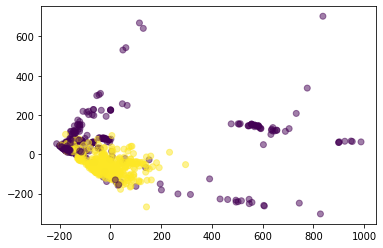

In [128]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = bb['FoodGroup'],alpha=0.5)

In [105]:
baby_pca = pca.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())     ### กำหนดให้ FoodGroup ที่เท่ากับ 1 เป็นอาหารกลุ่ม baby
fast_pca = pca.transform(bb[bb['FoodGroup']==8].iloc[:,1:].to_numpy())        #### กำหนดให้ FoodGroup ที่เท่ากับ 8 เป็นอาหา่รกลุ่ม fastfood

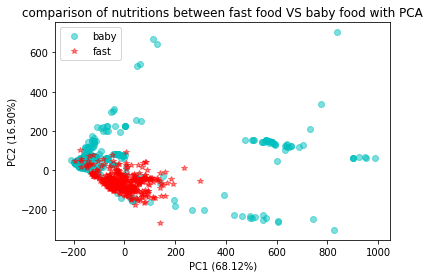

In [133]:
plt.plot(baby_pca[:,0],baby_pca[:,1],'oc',alpha=0.5,label='baby')
plt.plot(fast_pca[:,0],fast_pca[:,1],'*r',alpha=0.5,label='fast')
plt.legend()
plt.title('comparison of nutritions between fast food VS baby food with PCA')    #### ใส่ชื่อกราฟ
plt.xlabel('PC1 (68.12%)')
plt.ylabel('PC2 (16.90%)');

In [103]:
pca.explained_variance_ratio_

array([0.68119676, 0.16898343])

**ทำ PCA อีกรอบ เพราะ pca เดิมรวมกันได้ไม่ถึง 90%**

In [108]:
pca = PCA()
new_pca3 = pca.fit_transform(bb.iloc[:,1:].to_numpy())   ### แปลงไปเป็น numpy

In [107]:
pca.explained_variance_ratio_

array([6.81196764e-01, 1.68983428e-01, 1.23273387e-01, 1.65517518e-02,
       5.71769252e-03, 1.85803141e-03, 1.10203053e-03, 6.69929682e-04,
       2.33597905e-04, 2.07126430e-04, 1.78102675e-04, 1.94107098e-05,
       3.50360170e-06, 2.96252799e-06, 1.28613636e-06, 4.72018359e-07,
       1.30461474e-07, 1.12069236e-07, 9.31767084e-08, 7.02203952e-08,
       5.91564018e-08, 4.86630880e-08, 8.51053846e-09, 7.32117632e-21,
       1.14573802e-24, 1.04172975e-24, 9.90033583e-25, 9.43813012e-25,
       7.67044472e-25, 6.58839348e-25, 1.40442602e-33])

In [109]:
sum(pca.explained_variance_ratio_[:3])

0.9734535797566086

In [110]:
pca2 = PCA(n_components=3)
new_pca3 = pca2.fit_transform(bb.iloc[:,1:].to_numpy())

In [111]:
new_pca3

array([[ -28.78063378, -116.55183252, -148.53355877],
       [-177.91134481,   18.88378055,   28.68471267],
       [-177.91134481,   18.88378055,   28.68471267],
       ...,
       [-184.18041749,   28.07485153,   35.71512032],
       [-178.64788243,   26.05612238,   33.83158067],
       [-182.08363196,   28.69722116,   46.86794303]])

In [112]:
baby_pca3 = pca2.transform(bb[bb['FoodGroup']==1].iloc[:,1:].to_numpy())
fast_pca3 = pca2.transform(bb[bb['FoodGroup']==8].iloc[:,1:].to_numpy())

In [113]:
baby_pca3

array([[ -28.78063378, -116.55183252, -148.53355877],
       [-177.91134481,   18.88378055,   28.68471267],
       [-177.91134481,   18.88378055,   28.68471267],
       ...,
       [-184.18041749,   28.07485153,   35.71512032],
       [-178.64788243,   26.05612238,   33.83158067],
       [-182.08363196,   28.69722116,   46.86794303]])

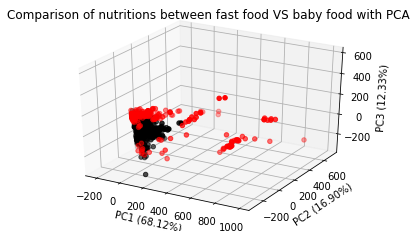

In [118]:
ax = plt.axes(projection ="3d")
ax.scatter3D(baby_pca3[:,0],baby_pca3[:,1],baby_pca3[:,2],c='red')
ax.scatter3D(fast_pca3[:,0],fast_pca3[:,1],fast_pca3[:,2],c='black')
ax.set_title('Comparison of nutritions between fast food VS baby food with PCA')   #### ใส่ชื่อกราฟ
ax.set_xlabel('PC1 (68.12%)')
ax.set_ylabel('PC2 (16.90%)')
ax.set_zlabel('PC3 (12.33%)');

In [124]:
pca2.components_    ### ดูส่วนประกอบของ pca2 

array([[ 5.16457294e-01,  1.17568977e-02,  2.52116825e-02,
         6.02127386e-02,  4.46186711e-02,  5.02226073e-04,
         4.21740821e-01,  3.49680421e-04,  1.47650436e-03,
         3.52071169e-02,  1.34682927e-01,  7.27328960e-01,
         4.26801743e-04,  1.77428388e-02,  3.84076891e-03,
         1.71332179e-02,  4.68600912e-04,  2.05694365e-04,
         6.15210148e-04,  3.91190188e-04,  4.19800172e-04,
         3.36707318e-04,  6.20599575e-04,  8.81213179e-04,
         8.17607272e-04,  6.06107467e-04,  4.74225734e-07,
         1.42292116e-04,  6.46585826e-04,  3.11513053e-04,
         4.26655488e-04],
       [-4.98947906e-01, -2.60142479e-02, -2.07749100e-02,
        -5.22119426e-02,  3.80444830e-02, -4.34324580e-03,
         8.47924219e-01, -2.61718387e-04,  5.44759621e-05,
         5.70560587e-02,  3.66959950e-02, -1.42479436e-01,
         2.81558705e-05, -1.64469856e-02,  3.49366232e-03,
        -3.98093057e-02,  9.42138022e-04, -1.53951993e-04,
         2.26983175e-05,  6.33

In [116]:
np.argmax(pca2.components_[0,:])

11